<a href="https://colab.research.google.com/github/majavier26/DSProjects/blob/main/Typhoon%20path%20prediction/Web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import datetime
import numpy as np

Let's try obtaining the data for the 2013 Pacific typhoon season. We're using the data by the National Insitute of Informatics in Japan.

In [ ]:
url = 'http://agora.ex.nii.ac.jp/digital-typhoon/year/wnp/2013.html.en'
page_2013 = requests.get(url)

Now, we want to get all of the content in `page_2013`. Let's call `BeautifulSoup` and name this as `soup_2013`.

In [ ]:
soup_2013 = BeautifulSoup(page_2013.content, 'html.parser')

Now, we want to get the table in this website. Upon inspecting the elements of the website,

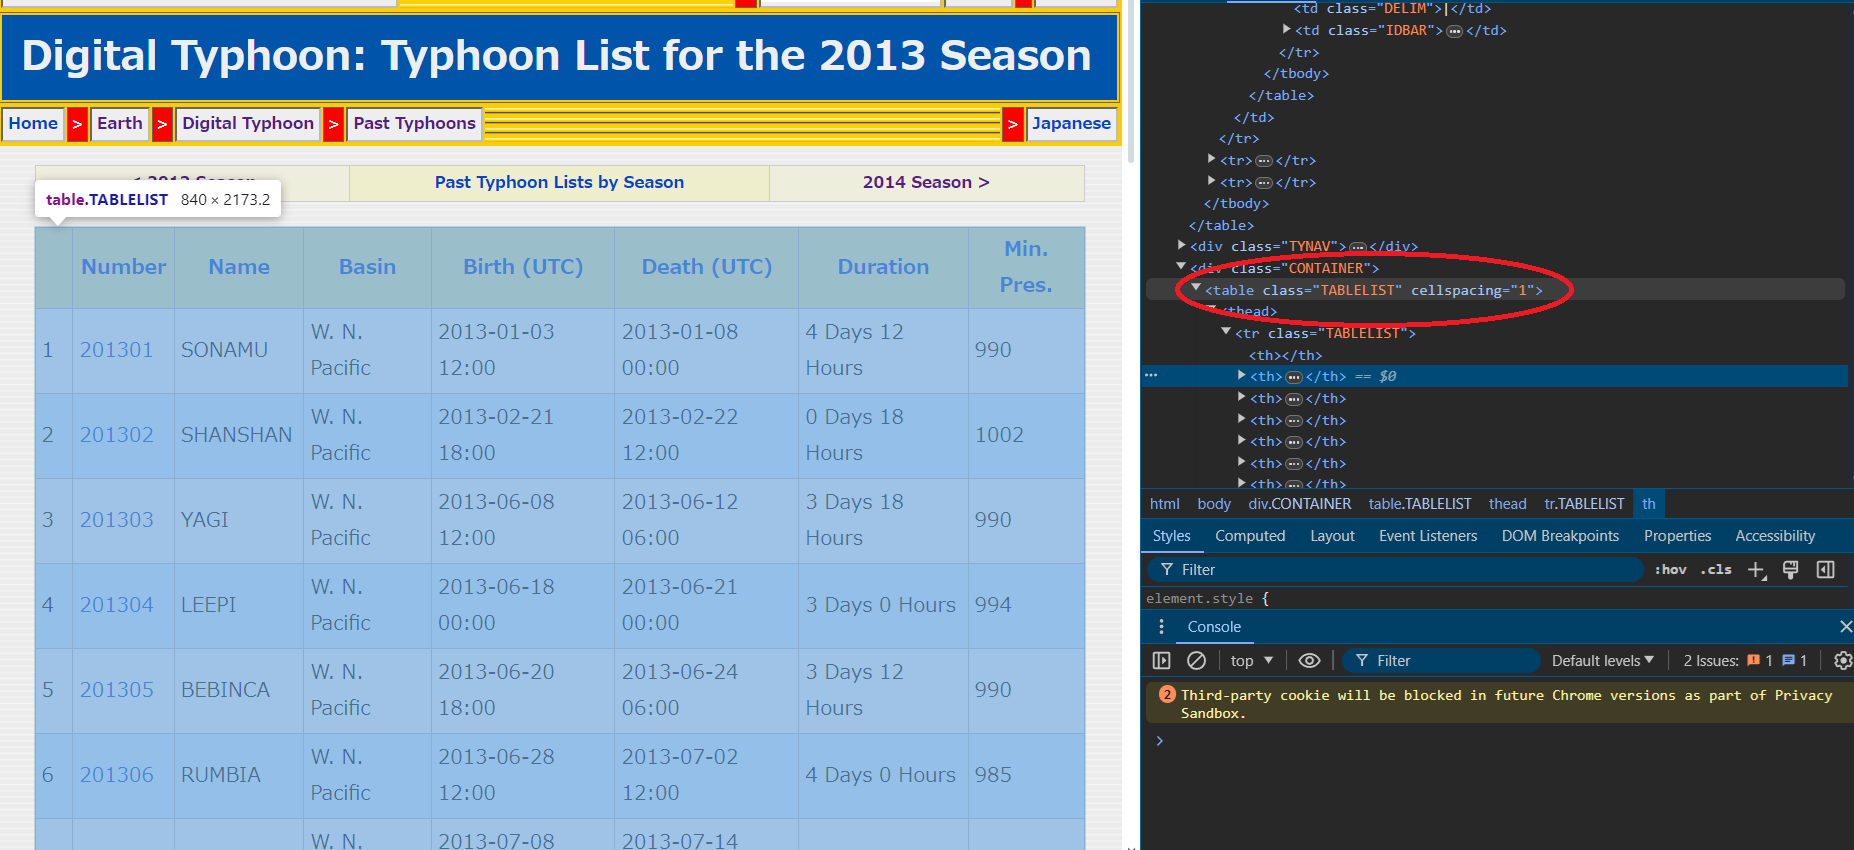

We can see `<table class="TABLELIST" cellspacing="1">`. Hovering on it, we can see that that is the table that we need. Thus, we need to find the tag "table" with the class "TABLELIST".

In [ ]:
table_2013 = soup_2013.find('table', class_='TABLELIST')

Now, we want to find all of the columns in here, where we call 'th', because the columns have the 'th' tag in them when we highlight them

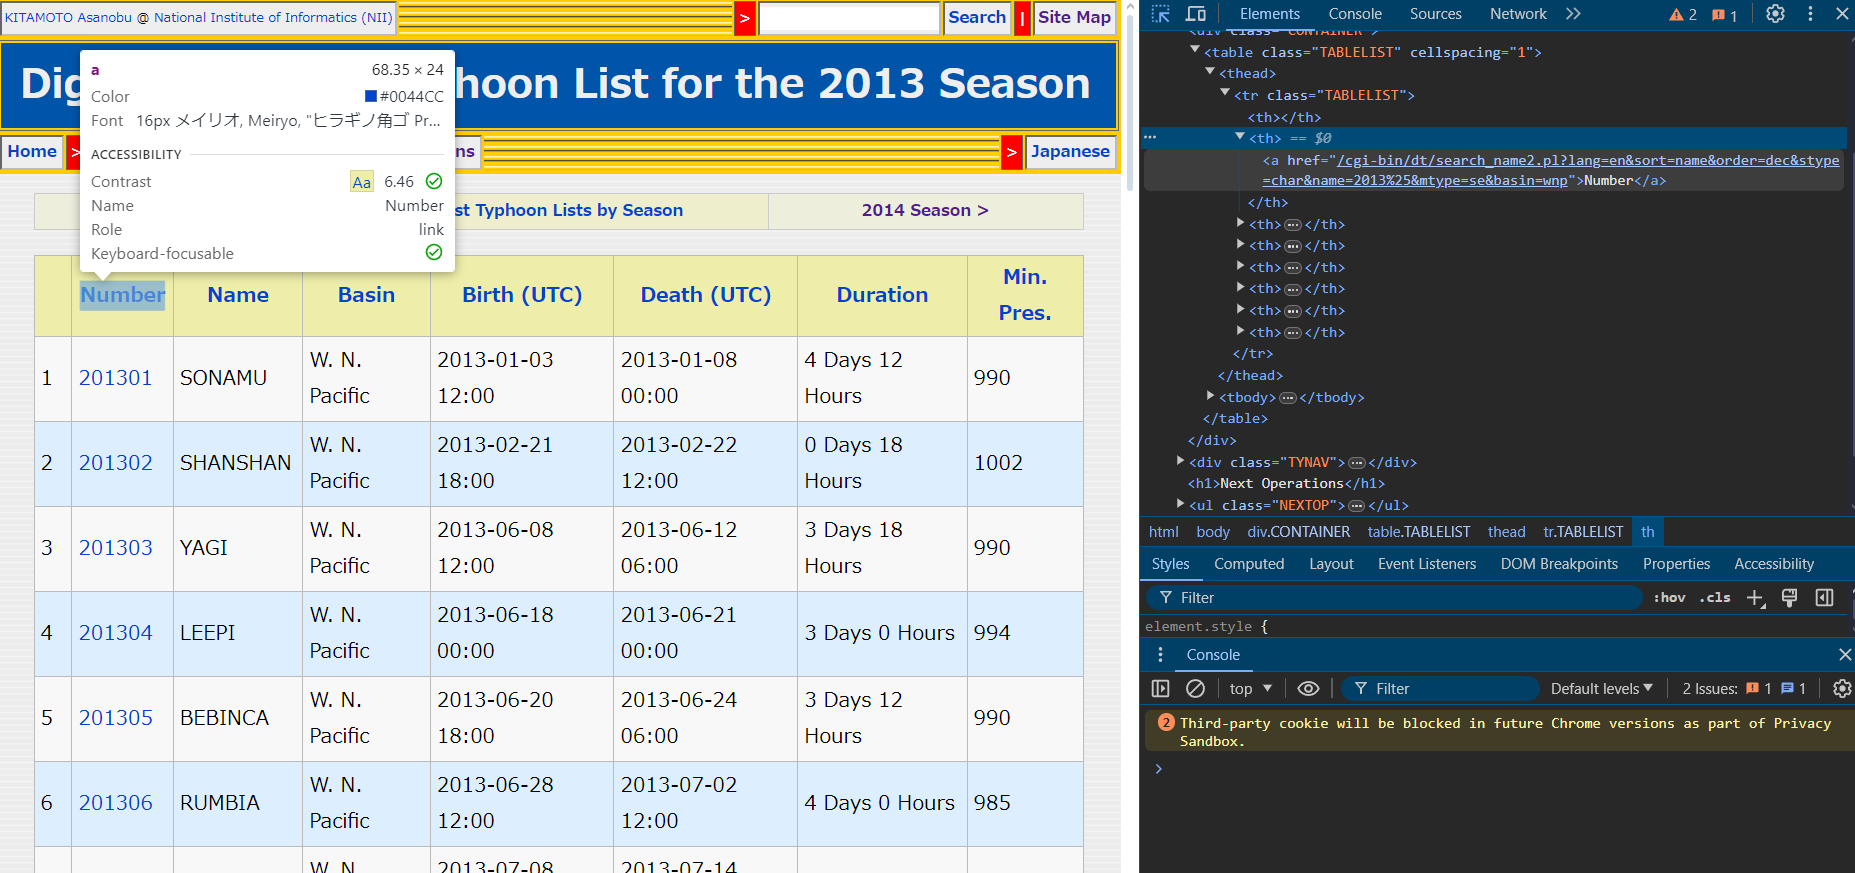

In [ ]:
headers_2013 = table_2013.find_all('th')
headers_2013

[<th></th>,
 <th><a href="/cgi-bin/dt/search_name2.pl?lang=en&amp;sort=name&amp;order=dec&amp;stype=char&amp;name=2013%25&amp;mtype=se&amp;basin=wnp">Number</a></th>,
 <th><a href="/cgi-bin/dt/search_name2.pl?lang=en&amp;sort=ename&amp;order=asc&amp;stype=char&amp;name=2013%25&amp;mtype=se&amp;basin=wnp">Name</a></th>,
 <th><a href="/cgi-bin/dt/search_name2.pl?lang=en&amp;sort=basin&amp;order=asc&amp;stype=char&amp;name=2013%25&amp;mtype=se&amp;basin=wnp">Basin</a></th>,
 <th><a href="/cgi-bin/dt/search_name2.pl?lang=en&amp;sort=slife&amp;order=asc&amp;stype=char&amp;name=2013%25&amp;mtype=se&amp;basin=wnp">Birth (UTC)</a></th>,
 <th><a href="/cgi-bin/dt/search_name2.pl?lang=en&amp;sort=elife&amp;order=asc&amp;stype=char&amp;name=2013%25&amp;mtype=se&amp;basin=wnp">Death (UTC)</a></th>,
 <th><a href="/cgi-bin/dt/search_name2.pl?lang=en&amp;sort=lifetime&amp;order=dec&amp;stype=number&amp;name=2013%25&amp;mtype=se&amp;basin=wnp">Duration</a></th>,
 <th><a href="/cgi-bin/dt/search_name2.

Now, we want to clean this as it's got too much unnecessary information

In [ ]:
columns_2013 = [column.text for column in headers_2013]
columns_2013

['',
 'Number',
 'Name',
 'Basin',
 'Birth (UTC)',
 'Death (UTC)',
 'Duration',
 'Min. Pres.']

Let's make a DataFrame that has these columns:

In [ ]:
typhoon_df_2013 = pd.DataFrame(columns=columns_2013)
typhoon_df_2013

,,Number,Name,Basin,Birth (UTC),Death (UTC),Duration,Min. Pres.


Now that that's cleaned off, now we want to get the content for each row.

In [ ]:
table_data_2013 = table_2013.find_all('tr')

for row in table_data_2013[1:]: # We are slicing with 1: because the empty row is probably due to the header row
  row_data = row.find_all('td')
  individual_row_data = [data.text for data in row_data]

  # Appending the current individual_row_data to the dataframe
  length = len(typhoon_df_2013)
  typhoon_df_2013.loc[length] = individual_row_data

In [ ]:
typhoon_df_2013.columns = ['Number', 'Typhoon ID', 'Name', 'Basin', 'Birth (UTC)', 'Death (UTC)', 'Duration', 'Min. Pres.']
typhoon_df_2013.set_index('Number', inplace=True)
typhoon_df_2013

,Typhoon ID,Name,Basin,Birth (UTC),Death (UTC),Duration,Min. Pres.
Number,,,,,,,
1,201301,SONAMU,W. N. Pacific,2013-01-03 12:00,2013-01-08 00:00,4 Days 12 Hours,990
2,201302,SHANSHAN,W. N. Pacific,2013-02-21 18:00,2013-02-22 12:00,0 Days 18 Hours,1002
3,201303,YAGI,W. N. Pacific,2013-06-08 12:00,2013-06-12 06:00,3 Days 18 Hours,990
4,201304,LEEPI,W. N. Pacific,2013-06-18 00:00,2013-06-21 00:00,3 Days 0 Hours,994
5,201305,BEBINCA,W. N. Pacific,2013-06-20 18:00,2013-06-24 06:00,3 Days 12 Hours,990
6,201306,RUMBIA,W. N. Pacific,2013-06-28 12:00,2013-07-02 12:00,4 Days 0 Hours,985
7,201307,SOULIK,W. N. Pacific,2013-07-08 00:00,2013-07-14 00:00,6 Days 0 Hours,925
8,201308,CIMARON,W. N. Pacific,2013-07-17 00:00,2013-07-18 18:00,1 Days 18 Hours,1000
9,201309,JEBI,W. N. Pacific,2013-07-31 00:00,2013-08-03 12:00,3 Days 12 Hours,985


Now, we have scraped the list of typhoons from 2013. Let's now automate this to get all the typhoons from 2013 to present.

In [ ]:
page = requests.get('http://agora.ex.nii.ac.jp/digital-typhoon/year/wnp/2025.html.en')
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find('table', class_='TABLELIST')
headers = table.find_all('th')

AttributeError: 'NoneType' object has no attribute 'find_all'

In [ ]:
current_year = datetime.date.today().year
typhoon_df_list = []

for year in range(1985, current_year+1):
  # Scraping data
  url = f'http://agora.ex.nii.ac.jp/digital-typhoon/year/wnp/{year}.html.en'
  page = requests.get(url)
  soup = BeautifulSoup(page.content, 'html.parser')

  try:
    table = soup.find('table', class_='TABLELIST')
    headers = table.find_all('th')
    columns = [column.text for column in headers_2013]

    # Initializing the dataframe
    typhoon_df = pd.DataFrame(columns=columns_2013)
    table_data = table.find_all('tr')

    for row in table_data[1:]: # We are slicing with 1: because the empty row is probably due to the header row
      row_data = row.find_all('td')
      individual_row_data = [data.text for data in row_data]

      # Appending the current individual_row_data to the dataframe
      length = len(typhoon_df)
      typhoon_df.loc[length] = individual_row_data

  except AttributeError:
      break

  typhoon_df.columns = ['Number', 'Typhoon ID', 'Name', 'Basin', 'Birth (UTC)', 'Death (UTC)', 'Duration', 'Min. Pres.']
  typhoon_df.set_index('Number', inplace=True)
  typhoon_df_list.append(typhoon_df)
  print(f'Done scraping typhoon list for year {year}')

Done scraping typhoon list for year 1985
Done scraping typhoon list for year 1986
Done scraping typhoon list for year 1987
Done scraping typhoon list for year 1988
Done scraping typhoon list for year 1989
Done scraping typhoon list for year 1990
Done scraping typhoon list for year 1991
Done scraping typhoon list for year 1992
Done scraping typhoon list for year 1993
Done scraping typhoon list for year 1994
Done scraping typhoon list for year 1995
Done scraping typhoon list for year 1996
Done scraping typhoon list for year 1997
Done scraping typhoon list for year 1998
Done scraping typhoon list for year 1999
Done scraping typhoon list for year 2000
Done scraping typhoon list for year 2001
Done scraping typhoon list for year 2002
Done scraping typhoon list for year 2003
Done scraping typhoon list for year 2004
Done scraping typhoon list for year 2005
Done scraping typhoon list for year 2006
Done scraping typhoon list for year 2007
Done scraping typhoon list for year 2008
Done scraping ty

Now, let's view the typhoon list for 2024.

In [ ]:
typhoon_df_list[-1]

,Typhoon ID,Name,Basin,Birth (UTC),Death (UTC),Duration,Min. Pres.
Number,,,,,,,
1,202401,EWINIAR,W. N. Pacific,2024-05-25 12:00,2024-05-30 18:00,5 Days 6 Hours,970
2,202402,MALIKSI,W. N. Pacific,2024-05-31 00:00,2024-05-31 12:00,0 Days 12 Hours,998
3,202403,GAEMI,W. N. Pacific,2024-07-20 00:00,2024-07-26 18:00,6 Days 18 Hours,935
4,202404,PRAPIROON,W. N. Pacific,2024-07-21 00:00,2024-07-23 12:00,2 Days 12 Hours,985
5,202405,MARIA,W. N. Pacific,2024-08-07 18:00,2024-08-12 06:00,4 Days 12 Hours,980
6,202406,SON-TINH,W. N. Pacific,2024-08-11 00:00,2024-08-13 12:00,2 Days 12 Hours,994
7,202407,AMPIL,W. N. Pacific,2024-08-12 12:00,2024-08-19 00:00,6 Days 12 Hours,950
8,202408,WUKONG,W. N. Pacific,2024-08-13 00:00,2024-08-14 12:00,1 Days 12 Hours,1002
9,202409,JONGDARI,W. N. Pacific,2024-08-18 12:00,2024-08-21 00:00,2 Days 12 Hours,996


In [ ]:
np.sum([len(df) for df in typhoon_df_list])

1014

And we can see Typhoon Yagi or Enteng as the last row! This is true as of writing this notebook.

Now, let's try getting the track for Super Typhoon Yolanda

In [ ]:
url_yolanda_1 = 'http://agora.ex.nii.ac.jp/digital-typhoon/summary/wnp/l/201330.html.en'
page_yolanda_1 = requests.get(url_yolanda_1)
soup_yolanda_1 = BeautifulSoup(page_yolanda_1.content, 'html.parser')
table_yolanda_1 = soup_yolanda_1.find('table', class_='SUMMARY')
headers_yolanda_1 = table_yolanda_1.find_all('th')
columns_yolanda_1 = [column.text.strip() for column in headers_yolanda_1]
df_yolanda_1 = pd.DataFrame(columns=columns_yolanda_1[1:]) # skip the first one because there is no 'Detailed Best Track...' column on the website
table_data_yolanda_1 = table_yolanda_1.find_all('tr')

for row in table_data_yolanda_1[4:-1]: # We are slicing with 1: because the empty row is probably due to the header row
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data]

  # Appending the current individual_row_data to the dataframe
  length = len(df_yolanda_1)
  df_yolanda_1.loc[length] = individual_row_data

df_yolanda_1.columns = ['Year', 'Month', 'Day', 'Hour', 'Lat.','Long.', 'Pressure (hPa)', 'Wind (kt)', 'Class', 'Image', 'Chart', 'Warning']
df_yolanda_1['Date'] = pd.to_datetime(df_yolanda_1[['Year', 'Month', 'Day', 'Hour']])
df_yolanda_1.set_index('Date', inplace=True)

In [ ]:
df_yolanda_1

,Year,Month,Day,Hour,Lat.,Long.,Pressure (hPa),Wind (kt),Class,Image,Chart,Warning
Date,,,,,,,,,,,,
2013-11-03 06:00:00,2013,11,3,06,5.8,157.2,1004,0,2,Image,Chart,Warning
2013-11-03 12:00:00,2013,11,3,12,6.1,155.5,1008,0,2,Image,Chart,Warning
2013-11-03 18:00:00,2013,11,3,18,6.1,153.3,1004,0,2,Image,Chart,Warning
2013-11-04 00:00:00,2013,11,4,00,6.1,152.2,1002,35,3,Image,Chart,Warning
2013-11-04 06:00:00,2013,11,4,06,6.2,150.4,1000,35,3,Image,Chart,Warning
2013-11-04 12:00:00,2013,11,4,12,6.3,148.8,998,40,3,Image,Chart,Warning
2013-11-04 18:00:00,2013,11,4,18,6.5,147.2,992,45,3,Image,Chart,Warning
2013-11-05 00:00:00,2013,11,5,00,6.5,145.9,985,55,4,Image,Chart,Warning
2013-11-05 06:00:00,2013,11,5,06,6.5,144.6,980,60,4,Image,Chart,Warning


- idadagdag yung enso as a variable
- madden julien din

In [ ]:
url_yolanda_2 = 'http://agora.ex.nii.ac.jp/digital-typhoon/summary/wnp/k/201330.html.en'
page_yolanda_2 = requests.get(url_yolanda_2)
soup_yolanda_2 = BeautifulSoup(page_yolanda_2.content, 'html.parser')
table_yolanda_2 = soup_yolanda_2.find('table', class_='SUMMARY')
headers_yolanda_2 = table_yolanda_2.find_all('th')
columns_yolanda_2 = [column.text.strip() for column in headers_yolanda_2]
df_yolanda_2 = pd.DataFrame(columns=columns_yolanda_2[1:]) # skip the first one because there is no 'Detailed Best Track...' column on the website
table_data_yolanda_2 = table_yolanda_2.find_all('tr')

for row in table_data_yolanda_2[4:-1]: # We are slicing with 1: because the empty row is probably due to the header row
  row_data = row.find_all('td')
  individual_row_data = [data.text.strip() for data in row_data]

  # Appending the current individual_row_data to the dataframe
  length = len(df_yolanda_2)
  df_yolanda_2.loc[length] = individual_row_data

df_yolanda_2.columns = ['Year', 'Month', 'Day', 'Hour', 'Lat.', 'Long.', 'Wind (kt)', 'Gust (kt)', 'Direc. of Major Storm Axis', 'Radius of Major Storm Axis (nm)', \
                      'Radius of Minor Storm Axis (nm)', 'Direc. of Major Gale Axis', 'Radius of Major Gale Axis (nm)', 'Radius of Minor Gale Axis (nm)', 'Image']
df_yolanda_2['Date'] = pd.to_datetime(df_yolanda_2[['Year', 'Month', 'Day', 'Hour']])
df_yolanda_2.set_index('Date', inplace=True)

In [ ]:
df_yolanda_2

,Year,Month,Day,Hour,Lat.,Long.,Wind (kt),Gust (kt),Direc. of Major Storm Axis,Radius of Major Storm Axis (nm),Radius of Minor Storm Axis (nm),Direc. of Major Gale Axis,Radius of Major Gale Axis (nm),Radius of Minor Gale Axis (nm),Image
Date,,,,,,,,,,,,,,,
2013-11-03 06:00:00,2013,11,3,06,5.8,157.2,0,0,-,-,-,-,-,-,Image
2013-11-03 12:00:00,2013,11,3,12,6.1,155.5,0,0,-,-,-,-,-,-,Image
2013-11-03 18:00:00,2013,11,3,18,6.1,153.3,0,0,-,-,-,-,-,-,Image
2013-11-04 00:00:00,2013,11,4,00,6.1,152.2,35,0,-,-,-,symmetric,60,60,Image
2013-11-04 06:00:00,2013,11,4,06,6.2,150.4,35,0,-,-,-,symmetric,60,60,Image
2013-11-04 12:00:00,2013,11,4,12,6.3,148.8,40,0,-,-,-,symmetric,100,100,Image
2013-11-04 18:00:00,2013,11,4,18,6.5,147.2,45,0,-,-,-,symmetric,120,120,Image
2013-11-05 00:00:00,2013,11,5,00,6.5,145.9,55,0,symmetric,30,30,symmetric,120,120,Image
2013-11-05 06:00:00,2013,11,5,06,6.5,144.6,60,0,symmetric,40,40,symmetric,120,120,Image


In [ ]:
df_yolanda_join = df_yolanda_1.join(df_yolanda_2, on='Date', how='left', lsuffix=None, rsuffix='_right')

In [ ]:
df_yolanda_join.drop(columns=['Image', 'Chart', 'Warning', 'Year_right', 'Month_right', 'Day_right', 'Hour_right', 'Lat._right', 'Long._right', \
                              'Image_right', 'Direc. of Major Storm Axis', 'Direc. of Major Gale Axis'])